In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
train_path = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt"
train_data = pd.read_csv("/content/train_data.txt", sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22425 entries, 1 to 22425
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        22425 non-null  object
 1   Genre        22425 non-null  object
 2   Description  22425 non-null  object
dtypes: object(3)
memory usage: 700.8+ KB


In [4]:
test_path = "/content/train_data.txt"

test_data = pd.read_csv(test_path, sep=":::", names=["ID", "Title","Description"], engine="python")

test_data.head()

,ID,Title,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:

def clean_description(text):

    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\s+", " ", text).strip()

    return text


train_data['Clean_Description'] = train_data['Description'].apply(clean_description)
test_data['Clean_Description']=test_data['Description'].apply(clean_description)

<ipython-input-6-74a4de9fe5aa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y="Genre", order=train_data["Genre"].value_counts().index, palette=palette)
<ipython-input-6-74a4de9fe5aa>:4: UserWarning: 
The palette list has fewer values (10) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=train_data, y="Genre", order=train_data["Genre"].value_counts().index, palette=palette)


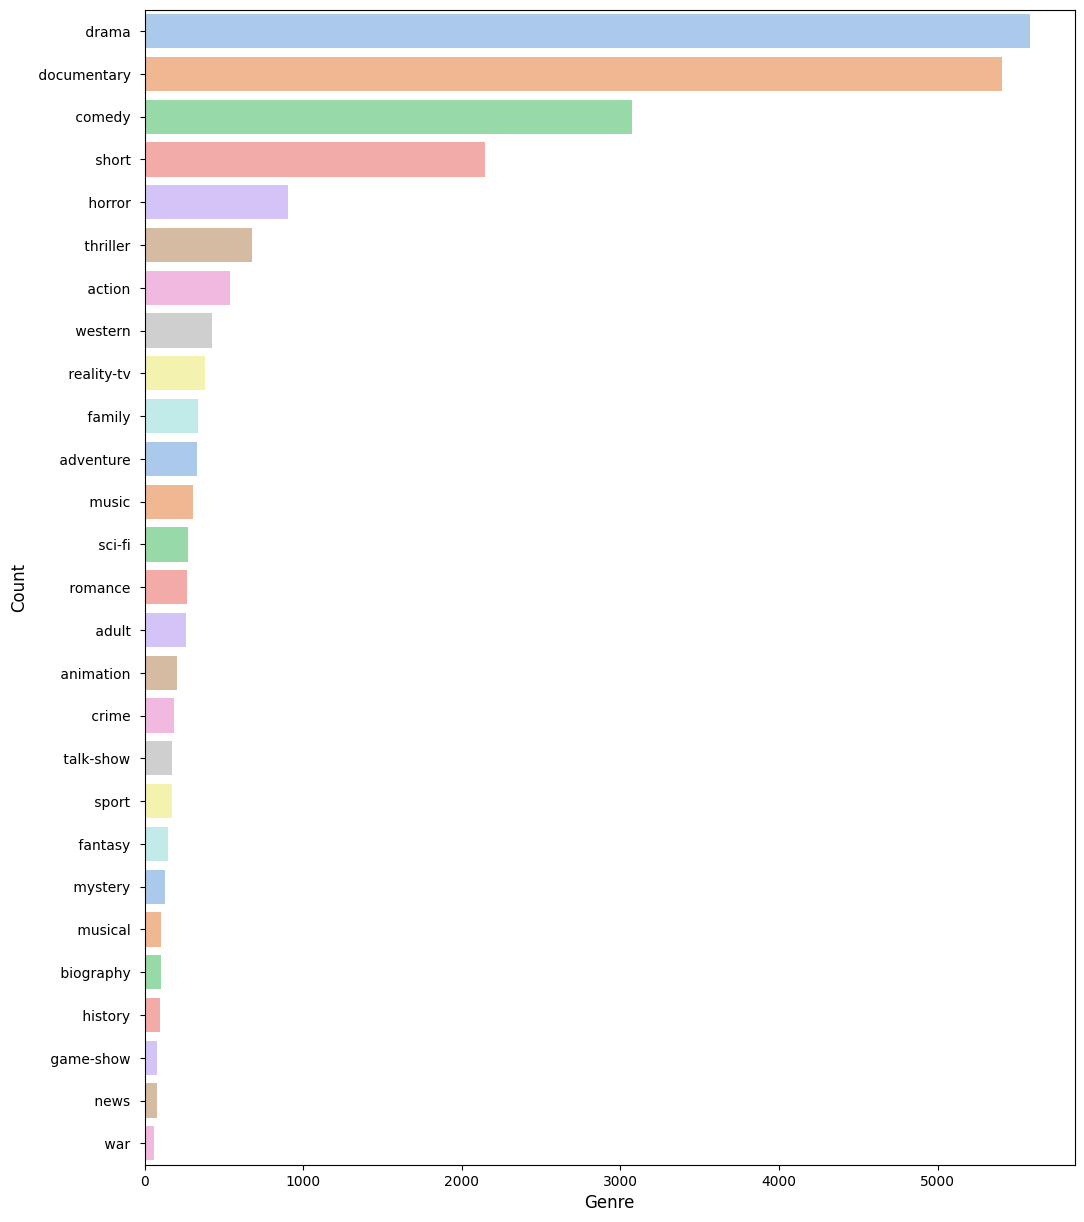

In [6]:

palette = sns.color_palette("pastel")

plt.figure(figsize=(12, 15))
sns.countplot(data=train_data, y="Genre", order=train_data["Genre"].value_counts().index, palette=palette)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.show()

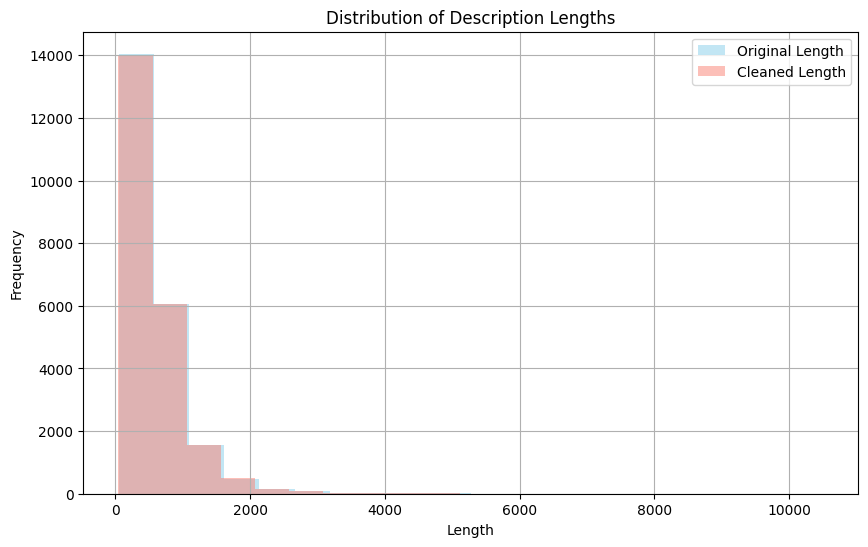

Total characters removed during cleaning: 383697


In [7]:

train_data['Original_Length'] = train_data['Description'].apply(len)
train_data['Cleaned_Length'] = train_data['Clean_Description'].apply(len)

plt.figure(figsize=(10, 6))

plt.hist(train_data['Original_Length'], bins=20, color='skyblue', alpha=0.5, label='Original Length')

plt.hist(train_data['Cleaned_Length'], bins=20, color='salmon', alpha=0.5, label='Cleaned Length')

plt.title('Distribution of Description Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

removed_characters = sum(train_data['Original_Length'] - train_data['Cleaned_Length'])
print("Total characters removed during cleaning:", removed_characters)


In [8]:

X = train_data['Description']
y = train_data['Genre']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state=123)

In [9]:

vectorize = TfidfVectorizer()

X_train_tfidf  = vectorize.fit_transform(X_train)
X_test_tfidf = vectorize.transform(test_data['Clean_Description'])
X_val_tfidf  = vectorize.transform(X_val)

In [10]:
svm_classifier = SVC()
svm_classifier.fit(X_val_tfidf, y_val)

SVC()

In [12]:

y_pred_val = svm_classifier.predict(X_val_tfidf)
valAccuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", valAccuracy)

Validation Accuracy: 0.8526198439241918
